In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#df=pd.read_csv("all3_merged_chron.csv")
df=pd.read_csv("pp_pe_merged_chron.csv")

## Missing values

In [23]:
temp = pd.DataFrame(df.isna().sum().sort_values(ascending=False)*100/df.shape[0],columns=['missing %'])
display(temp.style.background_gradient(cmap='Purples'))

,missing %
Please tell us a bit about why you selected the answer above._x,48.658718
Please tell us a bit about why you selected the answer above._y,48.211624
How easy was it to access the online content?,31.967213
How easy was it to navigate the website to find relevant product options?,30.923994
How easy was it to complete your purchase?,18.926975
"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_x",2.608048
NPS class_x,2.160954
"Based on your recent experience, how likely are you to recommend Kaplan to a friend or colleague?",2.160954
"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_y",1.341282
I am confident that I will achieve the goals that I set for myself.,1.192250


<AxesSubplot:>

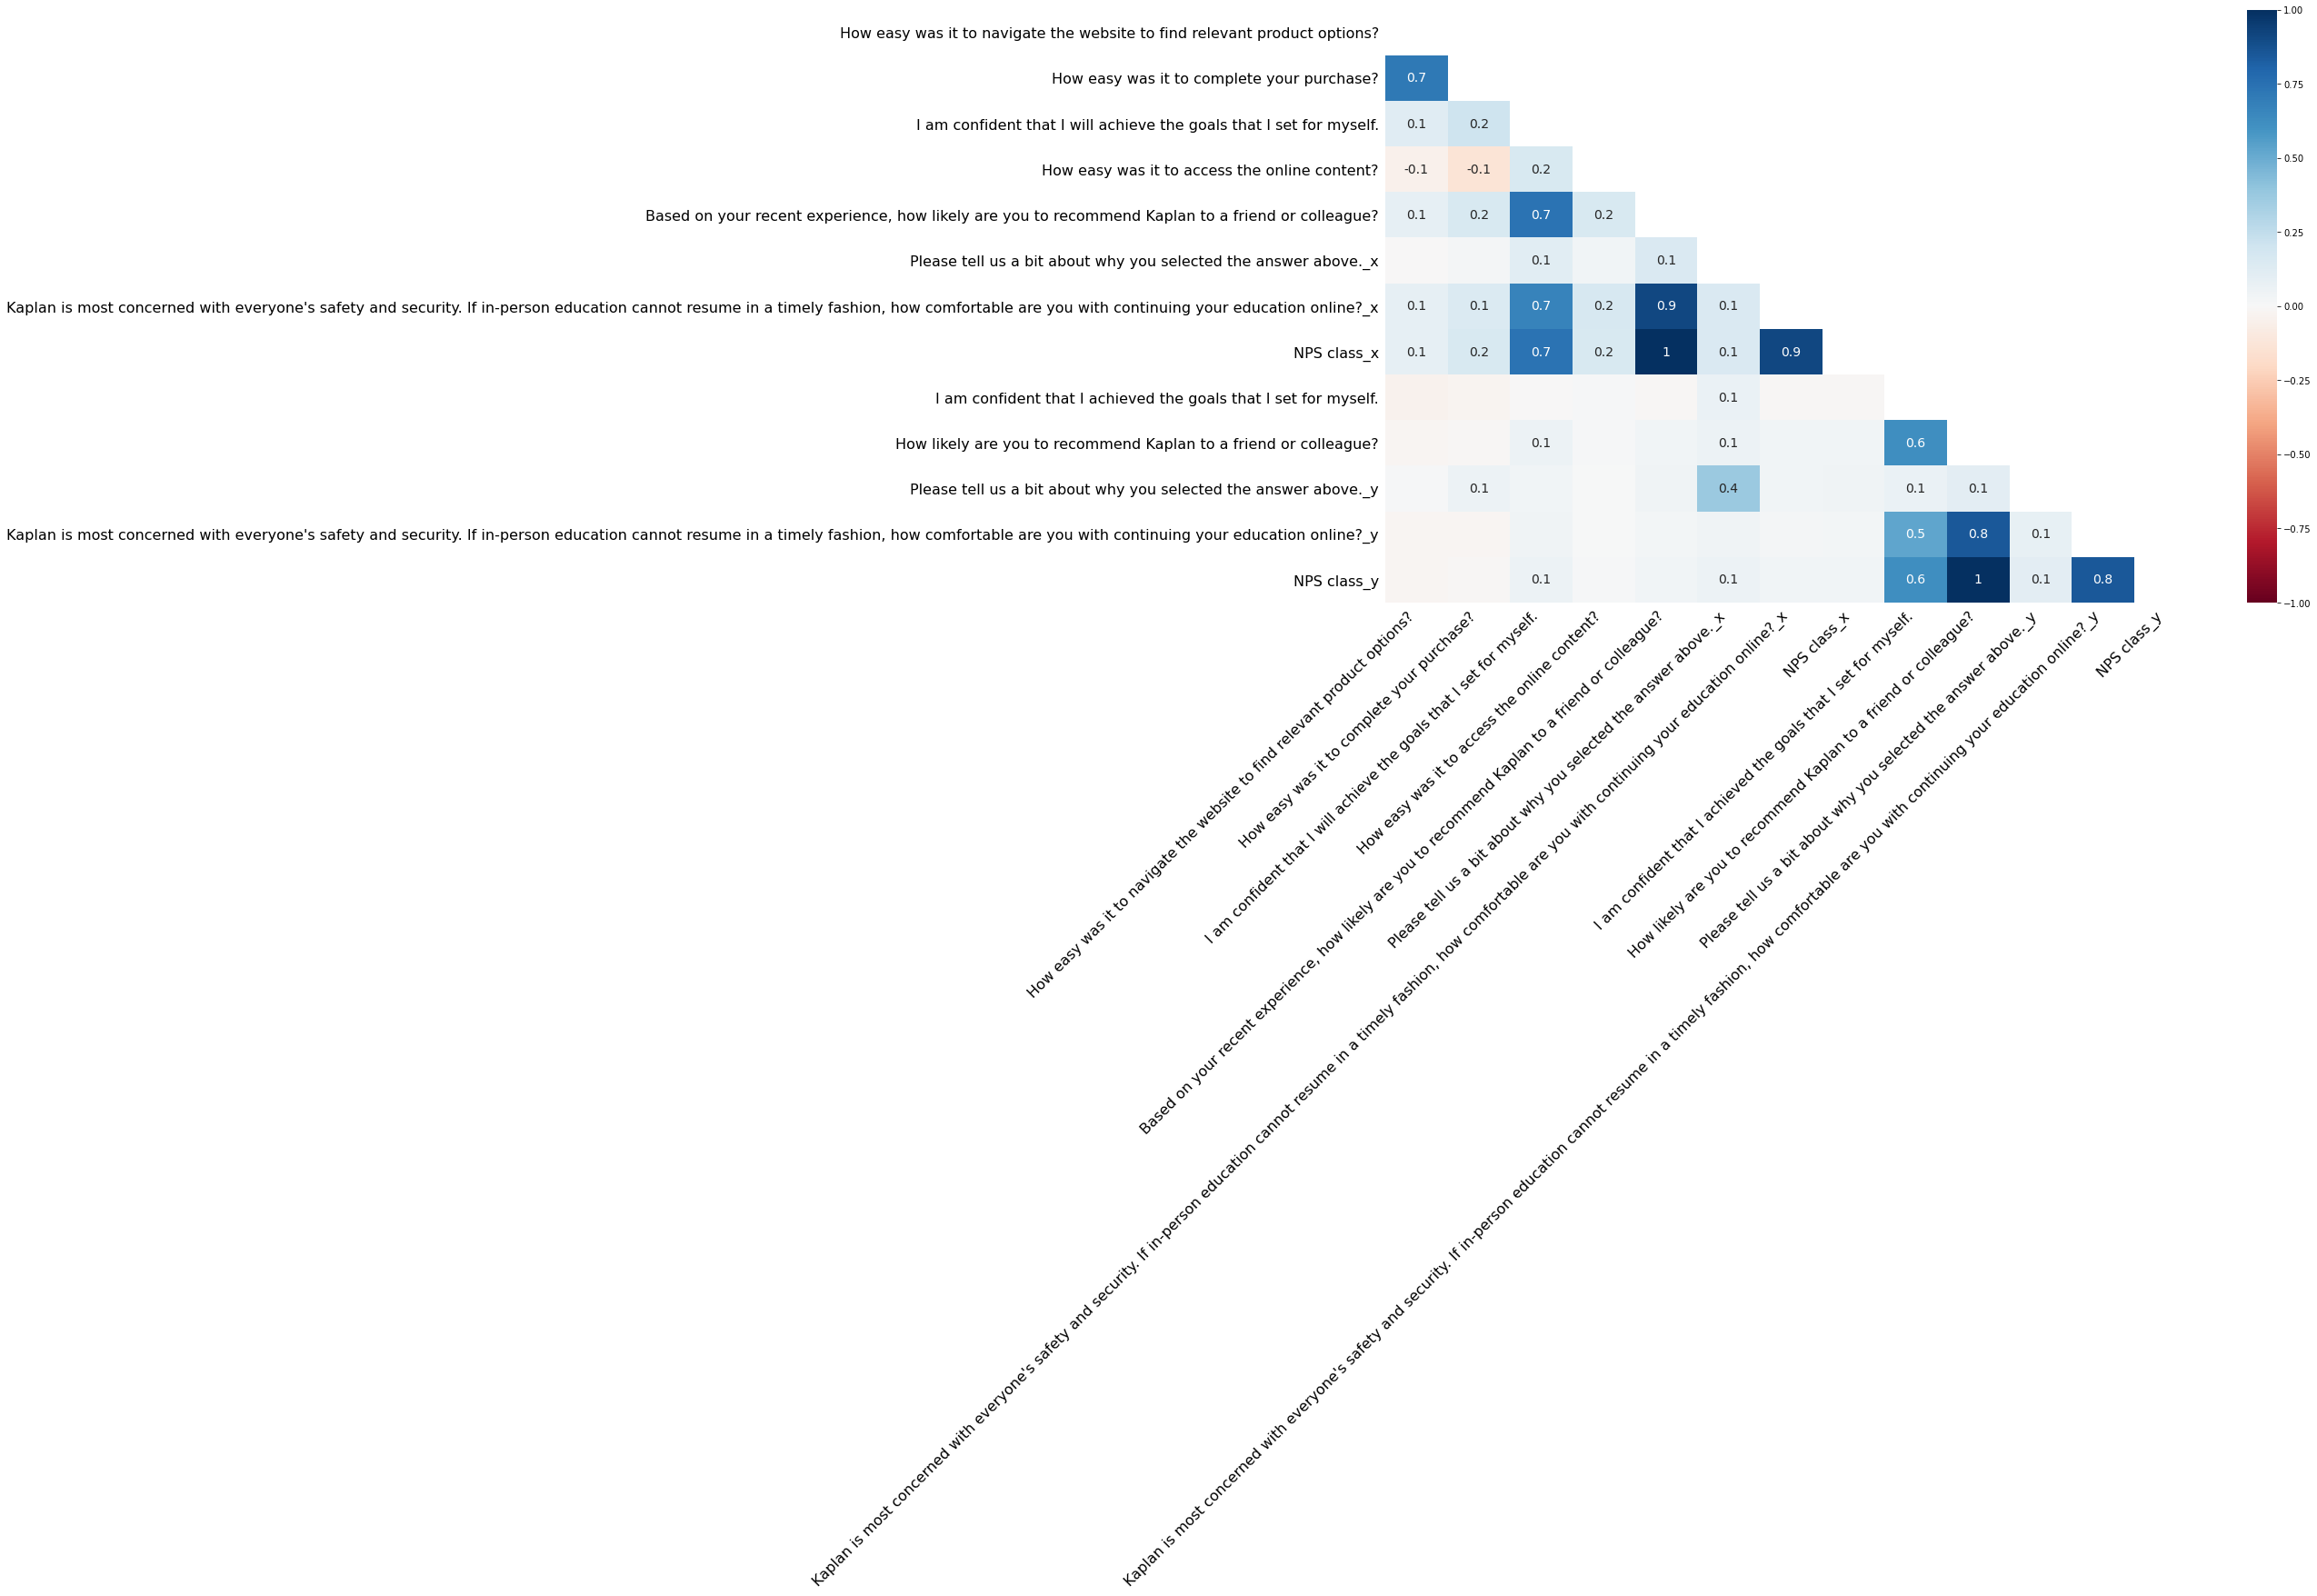

In [24]:
## Handling remaining missing values:
import missingno as msno

sorted = df[df.columns[df.isnull().any()].tolist()].sort_values('NPS class_y')
#msno.matrix(sorted)
msno.heatmap(sorted)

In [25]:
## Deleting columns and their pairs above a certain percentage missing

def delete(threshold_prec,df):
    temp = pd.DataFrame(df.isna().sum().sort_values(ascending=False)*100/df.shape[0],columns=['missing %'])
    f=temp.index
    a=list(temp[temp["missing %"]>threshold_prec].index)
    for i in a:
        c=str(i[:-1])
        d=[x for x in f if c in x]
        for j in d:
            if j not in a:
                a.append(j)
    df.drop(columns=a,inplace=True)

delete(45,df)
temp = pd.DataFrame(df.isna().sum().sort_values(ascending=False)*100/df.shape[0],columns=['missing %'])
display(temp.style.background_gradient(cmap='Purples'))

,missing %
How easy was it to access the online content?,31.967213
How easy was it to navigate the website to find relevant product options?,30.923994
How easy was it to complete your purchase?,18.926975
"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_x",2.608048
"Based on your recent experience, how likely are you to recommend Kaplan to a friend or colleague?",2.160954
NPS class_x,2.160954
"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_y",1.341282
I am confident that I will achieve the goals that I set for myself.,1.192250
NPS class_y,0.968703
How likely are you to recommend Kaplan to a friend or colleague?,0.968703


Missing values higly correlated, instead of deleting columns itself which may lead to loss of important independent variable, I am deleting rows, as the missing values are highly correlated this action will remove missing datapoints for most of the features.

In [27]:

#deleting features whose missing values are not correlated and >30%
df=df[df["Technical support_y"].notnull()]
temp = pd.DataFrame(df.isna().sum().sort_values(ascending=False)*100/df.shape[0],columns=['missing %'])
display(temp.style.background_gradient(cmap='Purples'))

,missing %
How easy was it to access the online content?,31.967213
How easy was it to navigate the website to find relevant product options?,30.923994
How easy was it to complete your purchase?,18.926975
"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_x",2.608048
"Based on your recent experience, how likely are you to recommend Kaplan to a friend or colleague?",2.160954
NPS class_x,2.160954
"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_y",1.341282
I am confident that I will achieve the goals that I set for myself.,1.192250
NPS class_y,0.968703
How likely are you to recommend Kaplan to a friend or colleague?,0.968703


In [28]:
df.shape

(1342, 52)

## Class 
Survey 1 --> 3

Detractors -> Passive (D_Pa) (Increase)

Detractors -> Promoters (D_pr) (Increase)

Passive -> Promoters (Pa_Pr) (Increase)

Passive -> Detractors (Pa_D) (Decrease)

Promoters -> Passive (Pr_Pa) (Decrease)

Promoters -> Detractors (Pr_D) (Decrease)

data very less, better to analyse feature contribution towards increase or decrease in the positive attitude towards the product. Then we will have only 3 classes **"Increase", "Decrease"
and "same"**.

"Increase" class represent students whose opinion improved and so on


In [29]:
### change 
import numpy as np
df.reset_index(drop=True,inplace=True)
df["change"]="Same"
for i in range(df.shape[0]):
    if((df.loc[i,"NPS class_x"]=="Detractors") & (df.loc[i,"NPS class_y"]=="Passive")):
        df.at[i,"change"]="Increase"
    if((df.at[i,"NPS class_x"]=="Detractors") & (df.at[i,"NPS class_y"]=="Promoters")):
        df.at[i,"change"]="Increase"
    if((df.at[i,"NPS class_x"]=="Passive") & (df.at[i,"NPS class_y"]=="Promoters")):
        df.at[i,"change"]="Increase"
    if((df.at[i,"NPS class_x"]=="Passive") & (df.at[i,"NPS class_y"]=="Detractors")):
        df.at[i,"change"]="Decrease"
    if((df.at[i,"NPS class_x"]=="Promoters" )& (df.at[i,"NPS class_y"]=="Passive")):
        df.at[i,"change"]="Decrease"
    if((df.at[i,"NPS class_x"]=="Promoters") & (df.at[i,"NPS class_y"]=="Detractors")):
        df.at[i,"change"]="Decrease"


In [30]:
display(df.head(3))

,Unnamed: 0,Respondent ID_x,Collector ID_x,Start Date_x,End Date_x,IP Address_x,Email Address_x,First Name_x,Last Name_x,Custom Data 4_x,Custom Data 5,Brand reputation_x,Price_x,Pass guarantee_x,Technical support_x,Quality of the product_x,Study materials available on a mobile device_x,Variety of the study materials_x,Difficulty of the practice questions_x,Quantity of the practice questions_x,"Course content that can be applied to the ""Real World""_x",How easy was it to navigate the website to find relevant product options?,How easy was it to complete your purchase?,I am confident that I will achieve the goals that I set for myself.,How easy was it to access the online content?,"Based on your recent experience, how likely are you to recommend Kaplan to a friend or colleague?","Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_x",NPS class_x,Respondent ID_y,Collector ID_y,Start Date_y,End Date_y,IP Address_y,Email Address_y,First Name_y,Last Name_y,Custom Data 4_y,How did you do on your exam?,Brand reputation_y,Price_y,Pass guarantee_y,Technical support_y,Quality of the product_y,Study materials available on a mobile device_y,Variety of the study materials_y,Difficulty of the practice questions_y,Quantity of the practice questions_y,"Course content that can be applied to the ""Real World""_y",I am confident that I achieved the goals that I set for myself.,How likely are you to recommend Kaplan to a friend or colleague?,"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_y",NPS class_y,change
0,8,12776208672,406636855,2021-06-27 08:20:00,27-06-2021 08:22,174.219.128.203,msandbulte@gmail.com,Melissa,Aanenson,Real Estate,8487016,4,4,4,4,4,4,4,2,2,4,3.0,3.0,3.0,3.0,6.0,3.0,Detractors,12399322033,399807393,2021-10-02 13:10:00,10-02-2021 13:13,216.16.54.90,msandbulte@gmail.com,Melissa,Aanenson,Real Estate Licensing,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Detractors,Same
1,14,12775430864,406636248,2021-06-26 15:36:00,26-06-2021 15:39,67.5.112.118,lsan@att.net,Lynda,Sanders,Insurance,8680595,3,3,0,1,4,0,1,2,2,3,3.0,3.0,3.0,3.0,10.0,4.0,Promoters,12396508852,399807917,2021-09-02 16:30:00,09-02-2021 16:38,174.31.24.72,lsan@att.net,Lynda,Sanders,LICENSING,1,4.0,3.0,3.0,3.0,3.0,0.0,4.0,3.0,4.0,4.0,3.0,7.0,4.0,Passive,Decrease
2,40,12706588986,405312395,2021-01-06 15:27:00,01-06-2021 15:29,173.18.14.110,tclement@midwesternsecurities.com,Tira,Clement,Securities,8800978,3,3,4,4,4,4,2,3,3,3,NaN,NaN,3.0,2.0,7.0,2.0,Passive,12549547170,402673005,2021-05-04 14:15:00,05-04-2021 14:17,173.18.14.110,tclement@midwesternsecurities.com,Tira,Clement,SECURITIES,3,2.0,2.0,0.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,10.0,4.0,Promoters,Increase


## Feature Engineering

Now that our target variable is also  based on change, we would do the same for independent variables. eg
**"Brand reputation"** we have 2 scores for the 2 surveys, instead of using the scores, we would use change in scores.

Similarly for each independent variables which are present in both the surveys we calculate the change in scores, which represents how the opinion of student changed.

In [8]:
col=["Unnamed: 0","Respondent ID_x","Collector ID_x","IP Address_x","Email Address_x","First Name_x","Last Name_x"
     ,"Respondent ID_y","Collector ID_y","End Date_y","End Date_x","IP Address_y","Email Address_y",
     "First Name_y","Last Name_y","Custom Data 4_x","Custom Data 4_y","Custom Data 5"]
df.drop(columns=col,inplace=True)

#time between 2 surveys
df['Start Date_x'] = pd.to_datetime(df['Start Date_x'])
df['Start Date_y'] = pd.to_datetime(df['Start Date_y'])
df["TimeDiff"]=(df["Start Date_y"]-df["Start Date_x"]).dt.days
df.drop(columns=["Start Date_x","Start Date_y"],inplace=True)

#change in ratings
a=[x for x in df.columns if (("_" in x) and ((df[x].dtype==np.int64) | (df[x].dtype==np.float64)))]
c=[x.split("_")[0] for x in a]
for i in set(c):
    name=i+str("_change")
    df[name]=df[i+"_y"]-df[i+"_x"]
df.drop(columns=a,inplace=True)

# deleting their ratings as we are only focusing on how their ratings influence their overall NPS class.
a=["NPS class_x","NPS class_y"]
df.drop(columns=a,inplace=True)


## Modeling

Now we have 3 classes "same","Increase","decrease", we could perform a multiclass classification and perform inference 
to find out the key drivers. Using **Xgboost for multiclass classification**

In [9]:
# xgboost

from sklearn.model_selection import train_test_split
X=df.loc[:,~df.columns.isin(["change"])]
y=df.loc[:,df.columns.isin(["change"])]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.15)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [10]:
##grid search hyperparameter training

# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob',
#                     silent=True, nthread=1)

# folds = 3
# param_comb = 10

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
# import sklearn
# scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring=scorer, n_jobs=4, cv=skf.split(X_train,y_train), verbose=False, random_state=1001 )

# random_search.fit(X_train, y_train)

# print('\n Best weighted F1 score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


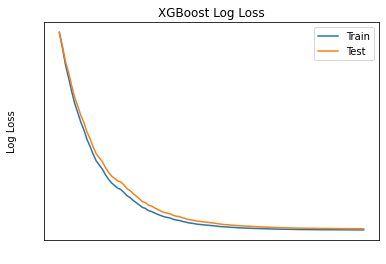

In [11]:
import xgboost as xgb
from matplotlib import pyplot

params={'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.0, 
        'colsample_bytree': 0.7,"objective":"multi:softprob"}

xgb1=xgb.XGBClassifier(**params)

eval_set = [(X_train, y_train), (X_test, y_test)]

model = xgb1.fit(X_train, y_train, eval_metric=["mlogloss"], eval_set=eval_set, verbose=False)

results = model.evals_result()

epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')

pyplot.show()
# from sklearn.metrics import accuracy_score
# print("Accuracy for model : %.2f" % (accuracy_score(y_test.values.ravel(), model.predict(X_test)) * 100))


## Using Shap to understand relation and correlation between the features and the change in Students opinion

Aim is to find how the change in **students opinion** (target variable) is related to **change in scores of differet questions** between the 2 surveys ( independent variable).
Given that we have built the dependent and independent variables mostly on change in scores, the correlation we measure is much more specific compared to if the variables used were normal scores of the 2 surveys instead of change.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


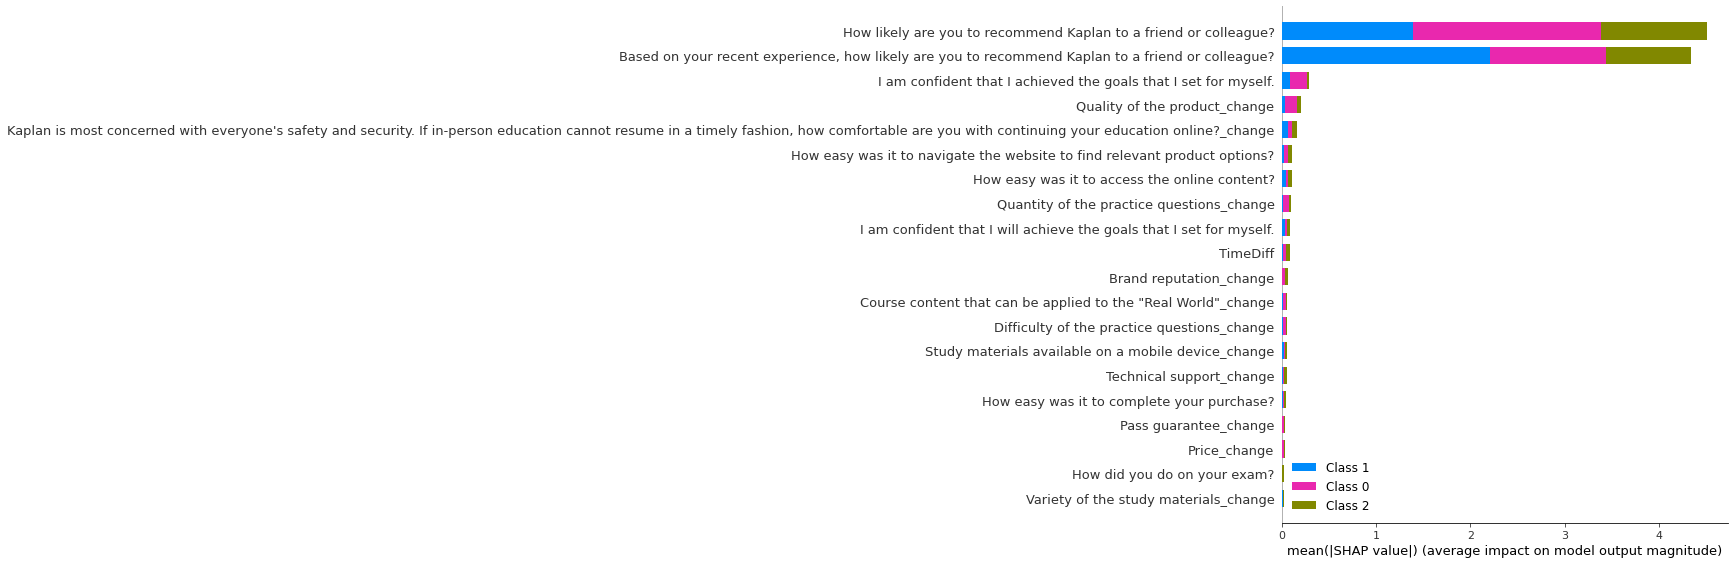

In [12]:
import shap
# monkey patch
mybooster = model.get_booster() 
model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

# shap expaliner
explainer = shap.TreeExplainer(mybooster)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

**Overall parameter importance from Shap**

## Correlation between features and target.

In [31]:
## feature effects for "2" class i.e, "Increase"

def feature_contri(X_train,shap_values,clas):
    a=(pd.DataFrame(shap_values[clas],columns=X_train.columns).sum())
    a=pd.DataFrame(a,columns=["effect_magnitude"])
    a["correlation"]="positive"
    a.loc[a["effect_magnitude"]<0,"correlation"]="negative"
    a["effect_magnitude"]=abs(a["effect_magnitude"])
    a.sort_values(by="effect_magnitude",inplace=True,ascending=False)
    def highlight_greaterthan(s, column):
        is_max = pd.Series(data=False, index=s.index)
        is_max[column] = s.loc[column] == "negative"
        return ['background-color: #ffe6e6' if is_max.any() else 'background-color: #e6ffe6' for v in is_max]

    return a.style.apply(highlight_greaterthan, column=['correlation'], axis=1)

display(feature_contri(X_train,shap_values,2))

,effect_magnitude,correlation
How likely are you to recommend Kaplan to a friend or colleague?,287.729980,positive
I am confident that I achieved the goals that I set for myself.,12.436909,negative
"Kaplan is most concerned with everyone's safety and security. If in-person education cannot resume in a timely fashion, how comfortable are you with continuing your education online?_change",11.278142,negative
How easy was it to navigate the website to find relevant product options?,8.944852,negative
How easy was it to complete your purchase?,3.542038,negative
I am confident that I will achieve the goals that I set for myself.,3.381141,negative
TimeDiff,3.070317,negative
Quality of the product_change,2.669627,negative
"Based on your recent experience, how likely are you to recommend Kaplan to a friend or colleague?",2.216353,negative
Variety of the study materials_change,2.031194,negative


So the above dataframe shows the effect of increase or decrease of feature values on the respective class, from the 
above dataframe if **"How likely are you to recommend Kaplan to a friend or colleague?"** value is high then this has a positive effect on "2" class, that means a student is more probable to improve his opinion.

**"negative correlation"** between **price change** and **change in student opinion**

**positive correlation** between **pass gurantee** and **change in student opinion**